In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from skmultiflow.trees import HoeffdingTree
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
# Load and preprocess data
fake_news = "D:/Dataset/Fake_News_Dataset_English/ISOT_fake.csv"
true_news = "D:/Dataset/Fake_News_Dataset_English/ISOT_true.csv"
true_df = pd.read_csv(fake_news)
fake_df = pd.read_csv(true_news)
true_df["label"] = 1  # 1 for true news
fake_df["label"] = 0  # 0 for fake news
combined_df = pd.concat([true_df, fake_df], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_df['text'], combined_df['label'], test_size=0.2, random_state=42)

In [7]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
# Train Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(random_state=42)
pac.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42)

In [9]:
# Train SGD Classifier
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(X_train_tfidf, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [10]:
# Train Hoeffding Tree classifier incrementally
ht = HoeffdingTree()
for i in range(len(combined_df)):
    text = combined_df.loc[i, 'text']
    label = combined_df.loc[i, 'label']
    X_partial = vectorizer.transform([text]).toarray()[0]
    ht.partial_fit([X_partial], [int(label)])

c:\Users\Kartik Gounder\Desktop\Projects\.venv\Lib\site-packages\skmultiflow\trees\hoeffding_tree.py:32: FutureWarning: 'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  warnings.warn("'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.\n"
c:\Users\Kartik Gounder\Desktop\Projects\.venv\Lib\site-packages\skmultiflow\bayes\utils.py:39: RuntimeWarning: overflow encountered in scalar multiply
  tmp = votes[class_index] * obs.probability_of_attribute_value_given_class(
c:\Users\Kartik Gounder\Desktop\Projects\.venv\Lib\site-packages\skmultiflow\bayes\utils.py:39: RuntimeWarning: invalid value encountered in scalar multiply
  tmp = votes[class_index] * obs.probability_of_attribute_value_given_class(


KeyboardInterrupt: 

In [9]:
# Get predictions
pac_pred = pac.predict(X_test_tfidf)
sgd_pred = sgd.predict(X_test_tfidf)
ht_pred = ht.predict(X_test_tfidf.toarray())

c:\Users\Kartik Gounder\Desktop\Projects\.venv\Lib\site-packages\skmultiflow\utils\utils.py:62: RuntimeWarning: invalid value encountered in scalar divide
  dictionary[key] = value / factor


In [10]:
# Concatenate predictions as features
X_test_features = pd.DataFrame({'PAC': pac_pred, 'SGD': sgd_pred, 'HT' :  ht_pred})

In [11]:
# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_test_features, y_test)

GradientBoostingClassifier()

In [12]:
# Get final predictions
final_pred = gb.predict(X_test_features)

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, final_pred)
print("Final accuracy:", accuracy)

Final accuracy: 0.9956570155902005


In [14]:
accuracy = accuracy_score(y_test, pac_pred)
print("Final accuracy PAC:", accuracy)
accuracy = accuracy_score(y_test, ht_pred)
print("Final accuracy HC:", accuracy)
accuracy = accuracy_score(y_test, sgd_pred)
print("Final accuracy SDG:", accuracy)

Final accuracy PAC: 0.9928730512249443
Final accuracy HC: 0.9837416481069042
Final accuracy SDG: 0.9775055679287306


In [15]:
# Print confusion matrices
print("Confusion Matrix for PAC:")
print(confusion_matrix(y_test, pac_pred))
print()

print("Confusion Matrix for SGD:")
print(confusion_matrix(y_test, sgd_pred))
print()

print("Confusion Matrix for HT:")
print(confusion_matrix(y_test, ht_pred))
print()

print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test, final_pred))
print()

Confusion Matrix for PAC:
[[4244   26]
 [  38 4672]]

Confusion Matrix for SGD:
[[4192   78]
 [ 124 4586]]

Confusion Matrix for HT:
[[4259   11]
 [ 135 4575]]

Confusion Matrix for Gradient Boosting Classifier:
[[4247   23]
 [  16 4694]]



In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, final_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

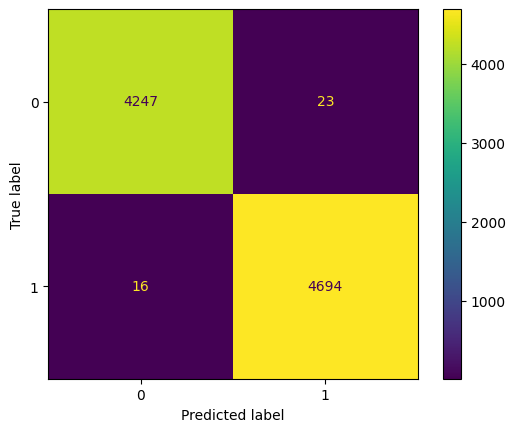

In [19]:
cm_display.plot()
plt.show()

In [20]:
Accuracy = metrics.accuracy_score(y_test, final_pred)
Precision = metrics.precision_score(y_test, final_pred)
Sensitivity_recall = metrics.recall_score(y_test, final_pred)
Specificity = metrics.recall_score(y_test, final_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, final_pred)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9956570155902005, 'Precision': 0.9951240195039219, 'Sensitivity_recall': 0.9966029723991507, 'Specificity': 0.9946135831381733, 'F1_score': 0.9958629468547788}
